In [1]:
import pandas as pd

In [2]:
import json

In [3]:
%pip install seaborn

In [4]:
import seaborn as sns

In [5]:
import matplotlib.pyplot as plt

In [6]:
import numpy as np

In [7]:
def df_avg(df):
    df=df.query("datatype in ['TMAX','TMIN']")
    df_TMAX=df.groupby('datatype').get_group('TMAX')[['date','value']].set_index('date')
    df_TMAX.rename(columns={'value':'TMAX'},inplace=True)
    df_TMIN=df.groupby('datatype').get_group('TMIN')[['date','value']].set_index('date')
    df_TMIN.rename(columns={'value':'TMIN'},inplace=True)
    df_concat = pd.concat([df_TMAX,df_TMIN],axis=1)
    df_concat['TAVG']=(df_concat['TMAX']+df_concat['TMIN'])/2
    df_TAVG=df_concat[['TAVG']]
    df_TAVG.index = [i.split('T')[0][5:] for i in df_TAVG.index]
    return df_TAVG

In [8]:
year=2008
df_final=pd.DataFrame()
while year<2022:
    file_name="data/winter_"+str(year)+"-"+str(year+1)+".json"
    file_pointer=open(file_name)
    file_data=pd.json_normalize(json.load(file_pointer)['results'])
    file_pointer.close()
    data_frame = df_avg(file_data)
    data_frame.columns=[str(year)+"-"+str(year+1)]
    df_final=pd.concat([df_final,data_frame],axis=1)
    year+=1

In [9]:
df_final

,2008-2009,2009-2010,2010-2011,2011-2012,2012-2013,2013-2014,2014-2015,2015-2016,2016-2017,2017-2018,2018-2019,2019-2020,2020-2021,2021-2022
12-15,-8.5,37.5,38.5,30.0,36.0,NaN,30.0,18.5,34.5,42.5,41.5,24.0,20.0,36.5
12-16,13.0,42.5,26.0,27.0,32.0,NaN,23.0,19.5,27.0,39.5,42.5,24.0,29.0,34.0
12-17,25.5,38.5,24.5,29.0,36.5,NaN,29.5,10.0,-6.0,31.5,42.5,28.5,34.0,27.5
12-18,16.5,30.0,25.5,41.5,33.5,NaN,33.0,29.5,3.5,37.0,41.0,42.0,28.0,24.5
12-19,29.0,32.5,38.0,29.5,15.5,NaN,34.0,38.0,23.5,38.0,39.0,32.0,30.0,44.0
12-20,15.5,38.0,36.5,29.5,28.0,NaN,35.0,37.0,41.5,47.5,33.5,35.5,33.0,42.5
12-21,9.5,45.5,27.5,30.0,38.5,NaN,39.0,35.0,39.5,20.5,43.5,47.0,45.5,43.0
12-22,15.0,36.0,27.5,15.0,40.0,NaN,31.0,37.0,30.5,25.5,26.5,51.5,45.5,46.5
12-23,19.0,20.0,34.0,21.5,40.0,NaN,26.5,29.0,36.5,24.0,31.5,49.5,21.5,47.0
12-24,27.0,12.0,31.5,24.0,25.0,NaN,34.0,25.0,40.5,10.0,33.5,42.0,35.5,40.5


In [10]:
df_final.to_csv('data/all_data_avg.csv')

In [11]:
df_hmap=df_final.fillna(0)

In [12]:
df_hmap

,2008-2009,2009-2010,2010-2011,2011-2012,2012-2013,2013-2014,2014-2015,2015-2016,2016-2017,2017-2018,2018-2019,2019-2020,2020-2021,2021-2022
12-15,-8.5,37.5,38.5,30.0,36.0,0.0,30.0,18.5,34.5,42.5,41.5,24.0,20.0,36.5
12-16,13.0,42.5,26.0,27.0,32.0,0.0,23.0,19.5,27.0,39.5,42.5,24.0,29.0,34.0
12-17,25.5,38.5,24.5,29.0,36.5,0.0,29.5,10.0,-6.0,31.5,42.5,28.5,34.0,27.5
12-18,16.5,30.0,25.5,41.5,33.5,0.0,33.0,29.5,3.5,37.0,41.0,42.0,28.0,24.5
12-19,29.0,32.5,38.0,29.5,15.5,0.0,34.0,38.0,23.5,38.0,39.0,32.0,30.0,44.0
12-20,15.5,38.0,36.5,29.5,28.0,0.0,35.0,37.0,41.5,47.5,33.5,35.5,33.0,42.5
12-21,9.5,45.5,27.5,30.0,38.5,0.0,39.0,35.0,39.5,20.5,43.5,47.0,45.5,43.0
12-22,15.0,36.0,27.5,15.0,40.0,0.0,31.0,37.0,30.5,25.5,26.5,51.5,45.5,46.5
12-23,19.0,20.0,34.0,21.5,40.0,0.0,26.5,29.0,36.5,24.0,31.5,49.5,21.5,47.0
12-24,27.0,12.0,31.5,24.0,25.0,0.0,34.0,25.0,40.5,10.0,33.5,42.0,35.5,40.5


In [13]:
df_hmap=df_hmap.transpose()

In [14]:
df_hmap

,12-15,12-16,12-17,12-18,12-19,12-20,12-21,12-22,12-23,12-24,...,01-12,01-13,01-14,01-15,01-16,01-17,01-18,01-19,01-20,01-21
2008-2009,-8.5,13.0,25.5,16.5,29.0,15.5,9.5,15.0,19.0,27.0,...,26.0,31.5,35.0,35.0,46.0,40.5,46.5,48.5,48.5,56.0
2009-2010,37.5,42.5,38.5,30.0,32.5,38.0,45.5,36.0,20.0,12.0,...,38.0,43.0,34.0,34.5,42.0,41.5,40.5,34.5,29.0,31.5
2010-2011,38.5,26.0,24.5,25.5,38.0,36.5,27.5,27.5,34.0,31.5,...,13.5,37.0,39.0,38.0,38.0,47.5,39.0,26.5,22.5,34.5
2011-2012,30.0,27.0,29.0,41.5,29.5,29.5,30.0,15.0,21.5,24.0,...,17.5,33.0,39.0,45.5,28.0,15.5,30.0,46.5,43.0,48.0
2012-2013,36.0,32.0,36.5,33.5,15.5,28.0,38.5,40.0,40.0,25.0,...,-1.0,0.5,2.0,13.5,35.5,34.5,44.0,41.0,30.5,36.5
2013-2014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,35.0,36.0,28.0,37.0,34.0,37.5,40.5,50.0,34.5,44.0
2014-2015,30.0,23.0,29.5,33.0,34.0,35.0,39.0,31.0,26.5,34.0,...,25.0,27.0,30.0,39.0,45.0,44.5,50.0,44.5,34.5,23.0
2015-2016,18.5,19.5,10.0,29.5,38.0,37.0,35.0,37.0,29.0,25.0,...,32.0,36.5,36.0,26.0,24.0,25.0,36.5,33.0,37.0,30.5
2016-2017,34.5,27.0,-6.0,3.5,23.5,41.5,39.5,30.5,36.5,40.5,...,29.0,28.5,32.0,28.5,31.0,31.5,36.5,38.0,35.5,30.5
2017-2018,42.5,39.5,31.5,37.0,38.0,47.5,20.5,25.5,24.0,10.0,...,35.0,33.5,38.5,13.5,15.0,33.0,46.5,51.0,37.5,25.5


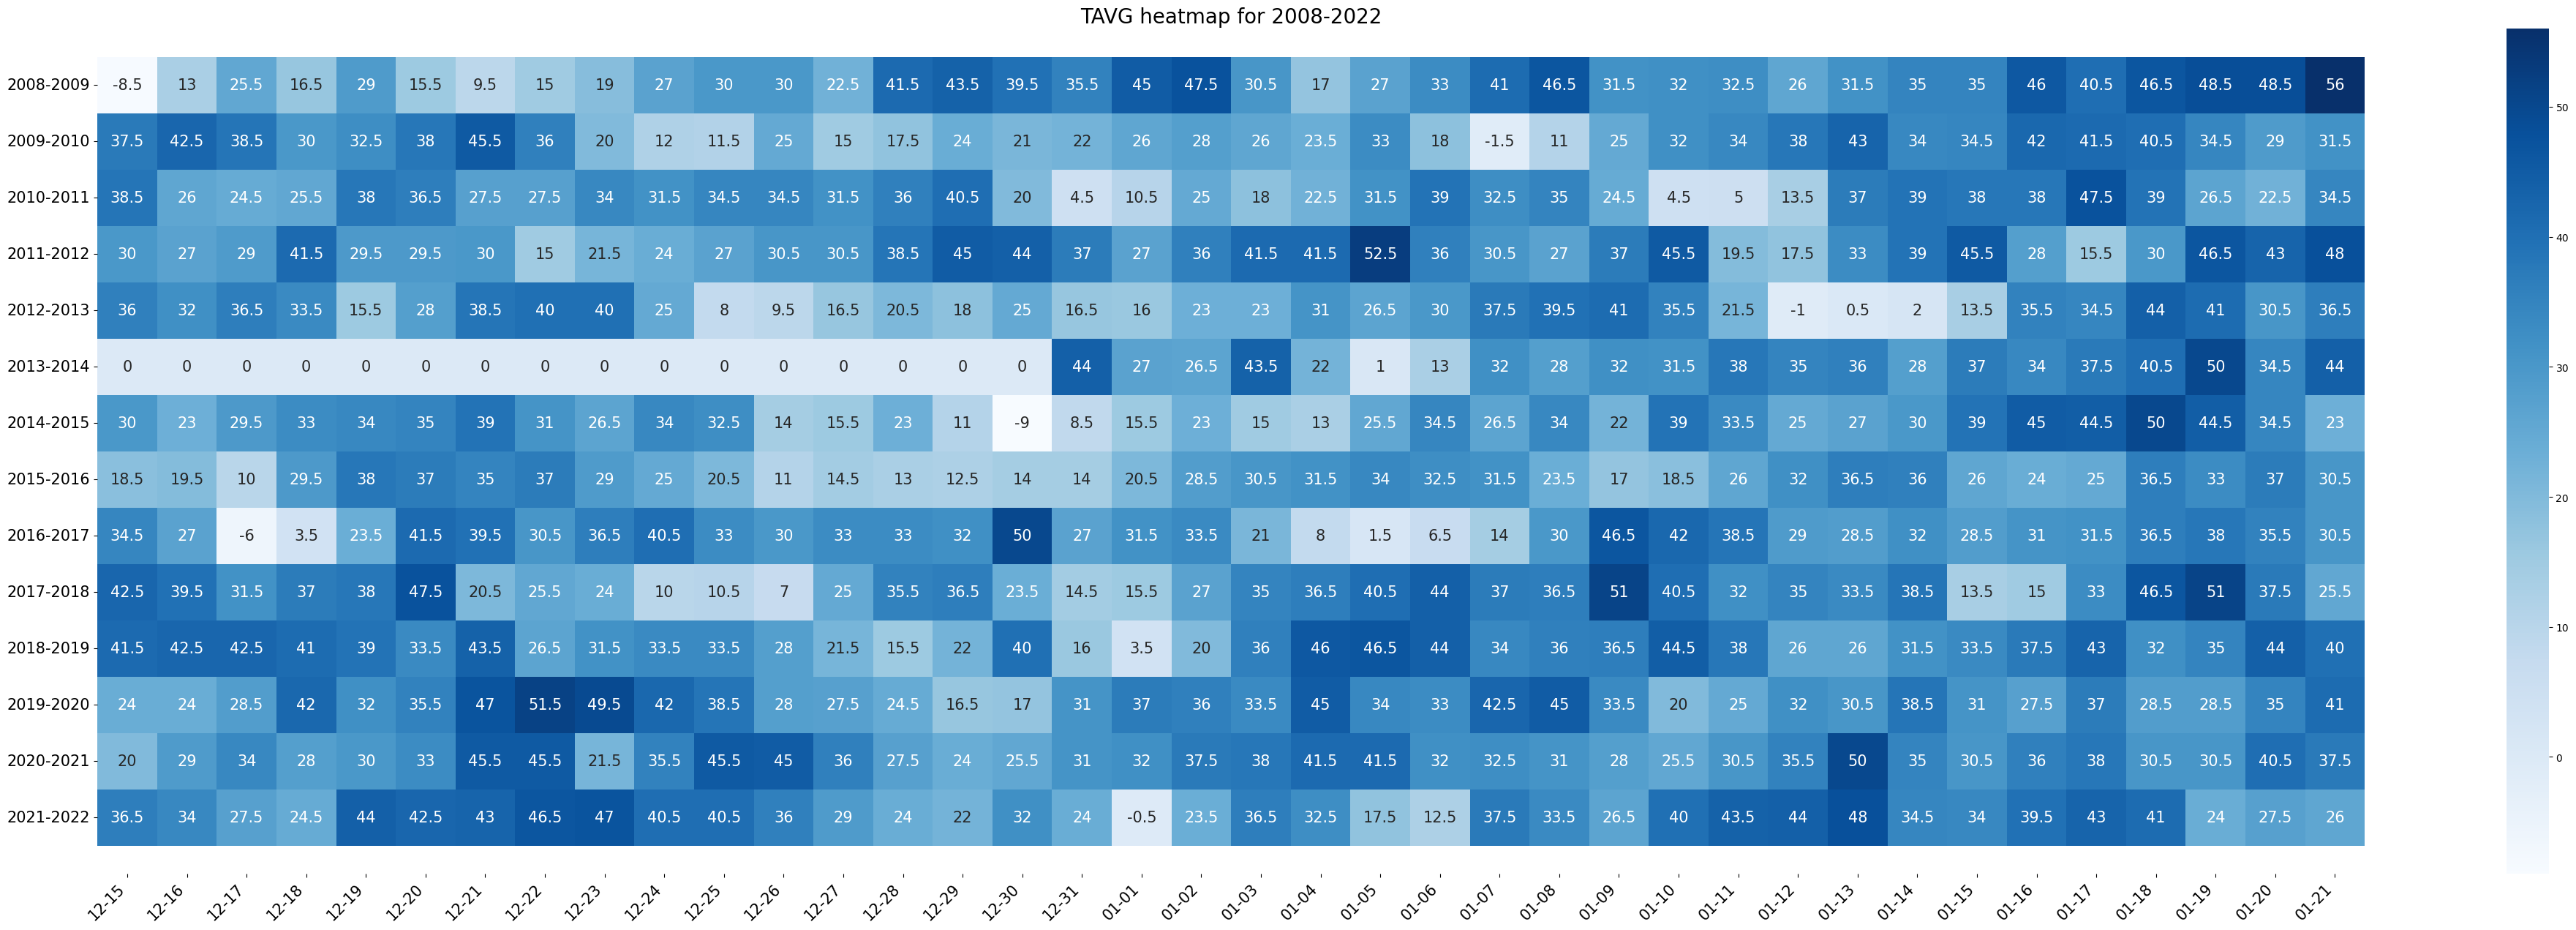

In [15]:
plt.figure(figsize=(50,15))
ax = sns.heatmap(df_hmap, annot=True, fmt='g', cmap='Blues', annot_kws={'fontsize': 15})
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title(label="TAVG heatmap for 2008-2022", fontsize=20)
plt.ylabel("")
plt.yticks(np.arange(len(df_hmap.index))+0.5,df_hmap.index,fontsize=15,rotation=0)
plt.xticks(fontsize=15,rotation=45,ha='right')
plt.savefig('heatmap.jpg')